In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
path20="/content/drive/My Drive/bitsproj/TECHM.NS.csv"
path19="/content/drive/My Drive/bitsproj/TECHM.NS19.csv"

In [3]:
df20 = pd.read_csv(path20)
df19 = pd.read_csv(path19)

In [4]:
df20.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,634.799988,634.799988,591.000000,603.400024,598.517761,6499354
1,2020-03-17,600.000000,617.950012,583.299988,595.450012,590.632080,3333465
2,2020-03-18,600.000000,611.250000,570.650024,579.650024,574.959900,3548257
3,2020-03-19,549.650024,577.650024,523.000000,530.000000,525.711609,4931298
4,2020-03-20,525.099976,595.450012,525.099976,576.349976,571.686584,6315992


In [5]:
df19.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-15,794.000000,807.500000,787.000000,799.299988,765.601563,3854238
1,2019-03-18,804.950012,805.700012,782.250000,788.599976,755.352661,3379301
2,2019-03-19,793.500000,797.450012,783.250000,794.650024,761.147644,2413153
3,2019-03-20,797.000000,806.200012,787.299988,789.849976,756.549988,3331375
4,2019-03-22,794.500000,798.000000,783.200012,788.750000,755.496399,2815749


In [6]:
df20.shape

(146, 7)

In [7]:
df19['newda'] = [df19['Date'][i][5:] for i in range(139)]
df20['newda'] = [df20['Date'][i][5:] for i in range(146)]
df19.head()

,Date,Open,High,Low,Close,Adj Close,Volume,newda
0,2019-03-15,794.000000,807.500000,787.000000,799.299988,765.601563,3854238,03-15
1,2019-03-18,804.950012,805.700012,782.250000,788.599976,755.352661,3379301,03-18
2,2019-03-19,793.500000,797.450012,783.250000,794.650024,761.147644,2413153,03-19
3,2019-03-20,797.000000,806.200012,787.299988,789.849976,756.549988,3331375,03-20
4,2019-03-22,794.500000,798.000000,783.200012,788.750000,755.496399,2815749,03-22


In [8]:
df_in = pd.merge(df19,df20,on='newda',how='inner')
df_in.head()

,Date_x,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,newda,Date_y,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2019-03-18,804.950012,805.700012,782.250000,788.599976,755.352661,3379301,03-18,2020-03-18,600.000000,611.250000,570.650024,579.650024,574.959900,3548257
1,2019-03-19,793.500000,797.450012,783.250000,794.650024,761.147644,2413153,03-19,2020-03-19,549.650024,577.650024,523.000000,530.000000,525.711609,4931298
2,2019-03-20,797.000000,806.200012,787.299988,789.849976,756.549988,3331375,03-20,2020-03-20,525.099976,595.450012,525.099976,576.349976,571.686584,6315992
3,2019-03-25,792.000000,795.450012,786.400024,789.599976,756.310547,1861646,03-25,2020-03-25,509.000000,542.849976,507.049988,526.700012,522.438354,3664272
4,2019-03-26,790.200012,791.900024,768.150024,770.750000,738.255188,3169827,03-26,2020-03-26,539.349976,564.900024,513.000000,515.200012,511.031403,5979874


In [9]:
ndf19=pd.DataFrame(df_in,columns=['Date_x','Open_x','High_x',	'Low_x','Close_x','Adj Close_x','Volume_x'])
ndf19.head()

,Date_x,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x
0,2019-03-18,804.950012,805.700012,782.250000,788.599976,755.352661,3379301
1,2019-03-19,793.500000,797.450012,783.250000,794.650024,761.147644,2413153
2,2019-03-20,797.000000,806.200012,787.299988,789.849976,756.549988,3331375
3,2019-03-25,792.000000,795.450012,786.400024,789.599976,756.310547,1861646
4,2019-03-26,790.200012,791.900024,768.150024,770.750000,738.255188,3169827


In [10]:
ndf20=pd.DataFrame(df_in,columns=['Date_y','Open_y','High_y',	'Low_y','Close_y','Adj Close_y','Volume_y'])
ndf20.head()

,Date_y,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2020-03-18,600.000000,611.250000,570.650024,579.650024,574.959900,3548257
1,2020-03-19,549.650024,577.650024,523.000000,530.000000,525.711609,4931298
2,2020-03-20,525.099976,595.450012,525.099976,576.349976,571.686584,6315992
3,2020-03-25,509.000000,542.849976,507.049988,526.700012,522.438354,3664272
4,2020-03-26,539.349976,564.900024,513.000000,515.200012,511.031403,5979874


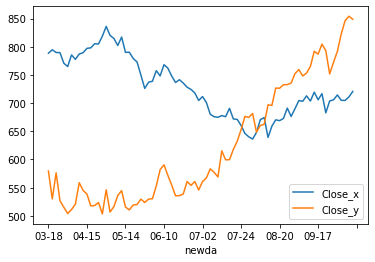

In [11]:
df_in.plot(x='newda',y=["Close_x","Close_y"])


In [12]:
daily_close19 = df_in[["Adj Close_x"]]
daily_log_returns19 = np.log(daily_close19.pct_change()+1)
daily_log_returns19.fillna(0, inplace=True)
print(daily_log_returns19)
daily_close20 = df_in[["Adj Close_y"]]
daily_log_returns20 = np.log(daily_close20.pct_change()+1)
daily_log_returns20.fillna(0, inplace=True)
print(daily_log_returns20)

    Adj Close_x
0      0.000000
1      0.007643
2     -0.006059
3     -0.000317
4     -0.024163
..          ...
75     0.012109
76    -0.013456
77    -0.000213
78     0.008829
79     0.013550

[80 rows x 1 columns]
    Adj Close_y
0      0.000000
1     -0.089548
2      0.083838
3     -0.090084
4     -0.022076
..          ...
75     0.024808
76     0.038103
77     0.028584
78     0.009174
79    -0.006224

[80 rows x 1 columns]


In [13]:
daily_pct_change19 = daily_close19 / daily_close19.shift(1) - 1
daily_pct_change19.fillna(0, inplace=True)
print(daily_pct_change19)
daily_pct_change20 = daily_close20 / daily_close20.shift(1) - 1
daily_pct_change20.fillna(0, inplace=True)
print(daily_pct_change20)

    Adj Close_x
0      0.000000
1      0.007672
2     -0.006040
3     -0.000316
4     -0.023873
..          ...
75     0.012183
76    -0.013366
77    -0.000213
78     0.008868
79     0.013642

[80 rows x 1 columns]
    Adj Close_y
0      0.000000
1     -0.085655
2      0.087453
3     -0.086146
4     -0.021834
..          ...
75     0.025118
76     0.038838
77     0.028997
78     0.009216
79    -0.006205

[80 rows x 1 columns]


In [14]:
daily_pct_changen19 = daily_pct_change19.to_numpy()
daily_pct_changen20 = daily_pct_change20.to_numpy()

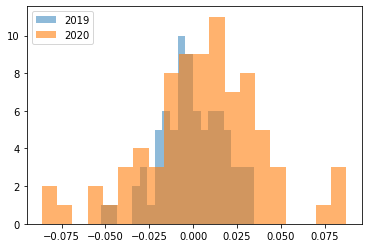

In [15]:
plt.hist(daily_pct_changen19,bins=20,label='2019',alpha=0.5)
plt.hist(daily_pct_changen20,bins=20,label='2020',alpha=0.6)
plt.legend(loc='upper left')
plt.show()

In [16]:
print(daily_pct_change19.describe())

       Adj Close_x
count    80.000000
mean     -0.000695
std       0.018035
min      -0.052339
25%      -0.012433
50%      -0.000407
75%       0.012548
max       0.034797


In [17]:
print(daily_pct_change20.describe())

       Adj Close_y
count    80.000000
mean      0.005448
std       0.033842
min      -0.086146
25%      -0.012109
50%       0.007709
75%       0.025655
max       0.087453


In [18]:
cum_daily_return19 = (1 + daily_pct_change19).cumprod()
print(cum_daily_return19)

    Adj Close_x
0      1.000000
1      1.007672
2      1.001585
3      1.001268
4      0.977365
..          ...
75     0.925658
76     0.913286
77     0.913091
78     0.921188
79     0.933755

[80 rows x 1 columns]


In [19]:
cum_daily_return20 = (1 + daily_pct_change20).cumprod()
print(cum_daily_return20)

    Adj Close_y
0      1.000000
1      0.914345
2      0.994307
3      0.908652
4      0.888812
..          ...
75     1.377053
76     1.430535
77     1.472016
78     1.485582
79     1.476364

[80 rows x 1 columns]


In [20]:
dta = [df_in['newda'],cum_daily_return19,cum_daily_return20]
exdf = pd.concat(dta,axis=1)
exdf = exdf.rename(columns={'newda':"Date",'Adj Close_x':'2019','Adj Close_y':'2020'})
exdf

,Date,2019,2020
0,03-18,1.000000,1.000000
1,03-19,1.007672,0.914345
2,03-20,1.001585,0.994307
3,03-25,1.001268,0.908652
4,03-26,0.977365,0.888812
...,...,...,...
75,09-30,0.925658,1.377053
76,10-01,0.913286,1.430535
77,10-07,0.913091,1.472016
78,10-09,0.921188,1.485582


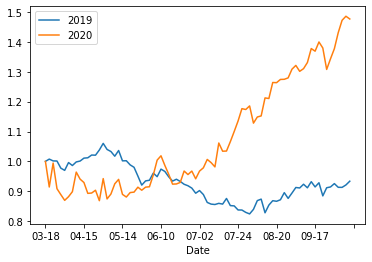

In [21]:
exdf.plot(x='Date',y=["2019","2020"] )

In [22]:
adj_close_px19 = ndf19['Adj Close_x']
moving_avg19 = adj_close_px19.rolling(window=40).mean()
print(moving_avg19[-10:])

70    668.523167
71    667.808920
72    666.602933
73    666.184909
74    665.697311
75    665.562585
76    665.370225
77    665.267586
78    665.467511
79    666.226816
Name: Adj Close_x, dtype: float64


In [23]:
adj_close_px20 = ndf20['Adj Close_y']
moving_avg20 = adj_close_px20.rolling(window=40).mean()
print(moving_avg20[-10:])

70    646.494345
71    652.430022
72    658.500977
73    664.016808
74    670.036459
75    676.467960
76    683.120180
77    690.537273
78    697.983223
79    705.667398
Name: Adj Close_y, dtype: float64


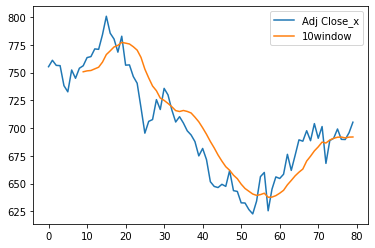

In [25]:
adj_close_px19 = ndf19['Adj Close_x']
ndf19['10window'] = adj_close_px19.rolling(window=10).mean()
ndf19[['Adj Close_x','10window']].plot()
plt.show()